<p style='text-aliged:center;font-size:50;color:Blue'>Data Analysis_Visualization数据分析图形展示篇</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
mpl.style.use('ggplot')
from sklearn import preprocessing,metrics
from sklearn.linear_model import LinearRegression,Ridge,LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV

In [3]:
ca=pd.read_excel('Canada.xlsx')
ca.head()

,Unnamed: 0,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,...,1450,1223,856,702,560,716,561,539,620,603
2,2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,...,0,0,1,0,0,0,0,0,0,0
4,4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,...,0,0,1,1,0,0,0,0,1,1


In [4]:
ca=ca.iloc[:,[3,5,7,9]+list(range(10,44))]
ca.head()

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [6]:
ca.rename(columns={'OdName':'Country','AreaName':'Continent','RegName':'Region'},inplace=True)
ca['Total']=ca.sum(axis=1)
ca=ca.sort_values('Total',ascending=False)
ca.reset_index(drop=True,inplace=True)
top5=ca.head()
top5

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
1,China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
2,United Kingdom of Great Britain and Northern I...,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
3,Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
4,Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


In [7]:
top5.set_index('Country',inplace=True)
top5

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


<AxesSubplot:>

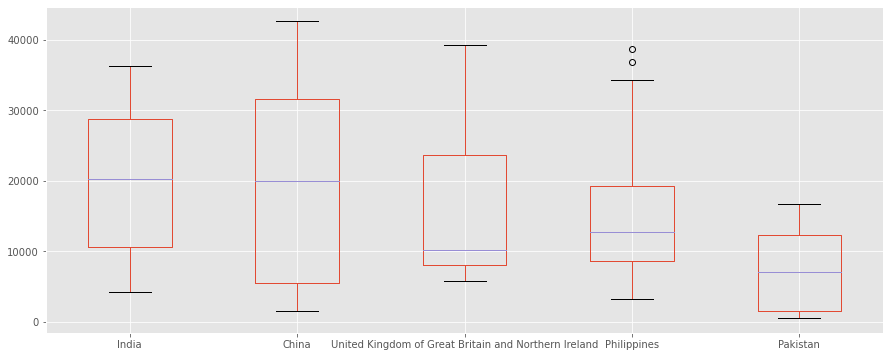

In [12]:
top5.loc[:,range(1980,2014)].T.plot(kind='box',figsize=(15,6))

<AxesSubplot:>

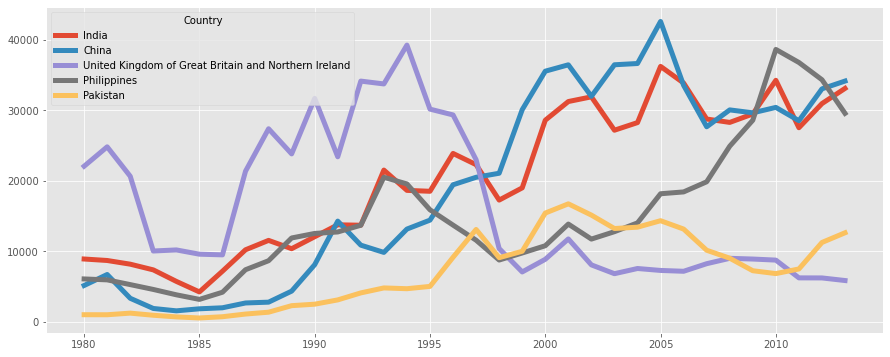

In [13]:
top5.loc[:,range(1980,2014)].T.plot(kind='line',lw=5,figsize=(15,6))

In [14]:
co=ca.groupby('Continent')['Total'].sum()
co

Continent
Africa                              618948
Asia                               3317794
Europe                             1410947
Latin America and the Caribbean     765148
Northern America                    241142
Oceania                              55174
Name: Total, dtype: int64

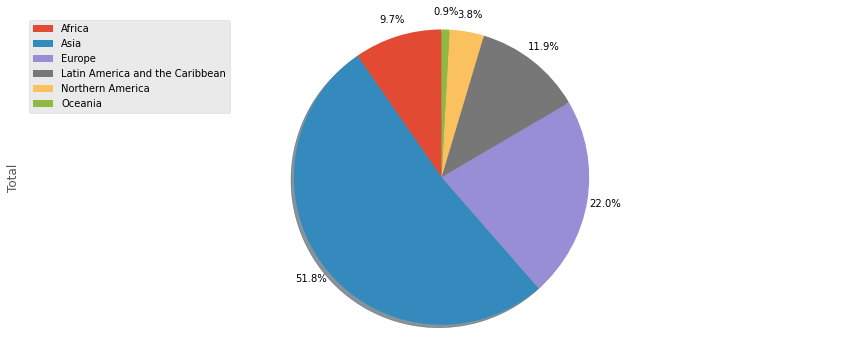

In [17]:
co.plot(kind='pie',autopct='%1.1f%%',pctdistance=1.12,startangle=90,shadow=True,labels=None,figsize=(15,6))
plt.legend(co.index,loc='upper left')
plt.axis('equal')
plt.show()

In [19]:
pp=ca.loc[:,['Country','Total']]
pp

,Country,Total
0,India,691904
1,China,659962
2,United Kingdom of Great Britain and Northern I...,551500
3,Philippines,511391
4,Pakistan,241600
...,...,...
190,San Marino,5
191,New Caledonia,5
192,Marshall Islands,2
193,Western Sahara,2


In [20]:
!pip install folium
import folium
from folium import plugins

In [37]:
o=pd.read_json('world_countries.json')
o['features'][0]['properties']['name']

'Afghanistan'

In [40]:
w=folium.Map([0,0],zoom_start=2)
threshold_scale=np.linspace(min(pp['Total']),max(pp['Total']),6,dtype=int).tolist()
threshold_scale[-1]=threshold_scale[-1]+1
w.choropleth(geo_data=r'world_countries.json',data=pp,columns=['Country','Total'],key_on='feature.properties.name',
            fill_color='YlOrRd',fill_opacity=0.6,line_opacity=0.2,threshold_scale=threshold_scale)
w

In [51]:
IC=top5.iloc[0:2,:].loc[:,range(1980,2014)].T
IC[0:5]

Country,India,China
1980,8880,5123
1981,8670,6682
1982,8147,3308
1983,7338,1863
1984,5704,1527


In [52]:
IC.columns.name=None
IC.reset_index(inplace=True)
IC.rename(columns={'index':'Year'},inplace=True)
IC[0:5]

,Year,India,China
0,1980,8880,5123
1,1981,8670,6682
2,1982,8147,3308
3,1983,7338,1863
4,1984,5704,1527


<AxesSubplot:xlabel='Year', ylabel='China'>

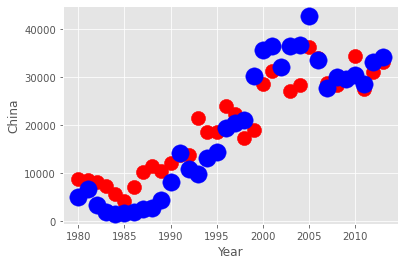

In [67]:
ax1=IC.plot(kind='scatter',x='Year',y='India',color='r',s=200)
IC.plot(kind='scatter',x='Year',y='China',color='b',s=300,ax=ax1)

<AxesSubplot:xlabel='Year', ylabel='China'>

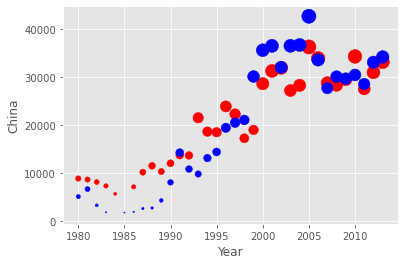

In [70]:
ni=preprocessing.MinMaxScaler().fit_transform(np.array(IC['India'].astype(float)).reshape(-1,1))
nc=preprocessing.MinMaxScaler().fit_transform(np.array(IC['China'].astype(float)).reshape(-1,1))
ax1=IC.plot(kind='scatter',x='Year',y='India',color='r',s=ni*200)
IC.plot(kind='scatter',x='Year',y='China',color='b',s=nc*200,ax=ax1)

In [73]:
crime=pd.read_csv('crime.csv')
crim=crime.iloc[0:200,:]
print(crim.info())
crim[0:5]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   IncidntNum  200 non-null    int64  
 2   Category    200 non-null    object 
 3   Descript    200 non-null    object 
 4   DayOfWeek   200 non-null    object 
 5   Date        200 non-null    object 
 6   Time        200 non-null    object 
 7   PdDistrict  200 non-null    object 
 8   Resolution  200 non-null    object 
 9   Address     200 non-null    object 
 10  X           200 non-null    float64
 11  Y           200 non-null    float64
 12  Location    200 non-null    object 
 13  PdId        200 non-null    int64  
dtypes: float64(2), int64(3), object(9)
memory usage: 22.0+ KB
None


,Unnamed: 0,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [74]:
!pip install geopy
from geopy.geocoders import Nominatim

     |████████████████████████████████| 112kB 6.5MB/s eta 0:00:01


In [76]:
address='San Francisco USA'
locator=Nominatim(user_agent='ff').geocode(address)
lat=locator.latitude
lng=locator.longitude
print(lat,lng)

37.7790262 -122.4199061


In [77]:
san=folium.Map([lat,lng],zoom_start=12)
d=plugins.MarkerCluster().add_to(san)
for lat,lng,la in zip(crim.Y,crim.X,crim.Category):
    d.add_child(folium.Marker([lat,lng],icon=None,popup=la))
san

In [78]:
!pip install wordcloud
from wordcloud import WordCloud,STOPWORDS

     |████████████████████████████████| 368kB 6.8MB/s eta 0:00:01


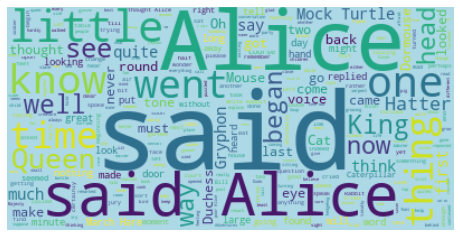

In [79]:
wc=WordCloud(max_words=2000,stopwords=STOPWORDS,background_color='lightblue')
wc.generate(open('alice_novel.txt','r').read())
plt.figure(figsize=(8,6))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

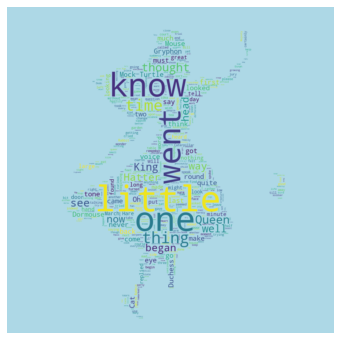

In [81]:
from PIL import Image
STOPWORDS.add('said')
STOPWORDS.add('Alice')
wc=WordCloud(max_words=2000,stopwords=STOPWORDS,mask=np.array(Image.open('alice_mask.png')),background_color='lightblue')
wc.generate(open('alice_novel.txt','r').read())
plt.figure(figsize=(8,6))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()